# Исследовательский анализ данных

## Импорт библиотек

In [1]:
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense, Conv2D, AveragePooling2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sb
from tensorflow.keras.applications.resnet import ResNet50
from PIL import Image

## Загрузка и оценка данных

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345) 

Found 7591 validated image filenames.


In [3]:
labels.shape

(7591, 2)

In [4]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


*Даные содержат 7591 фотографию с подписями. Пропусков в данных нет.*

## График распредеения возраста в выборке

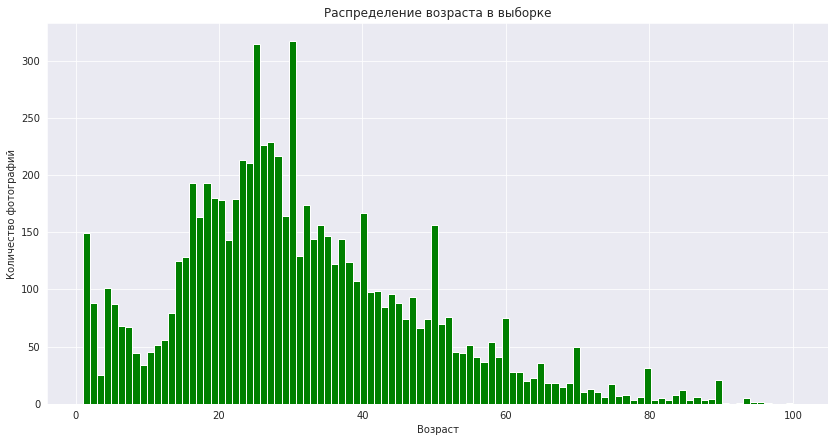

In [5]:
sb.set_style("dark")
labels.hist(bins=100,figsize=(14,7), color="green")
plt.title('Распределение возраста в выборке')
plt.xlabel('Возраст')
plt.ylabel('Количество фотографий')
plt.show()

In [6]:
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Оценка данных о возрасте')

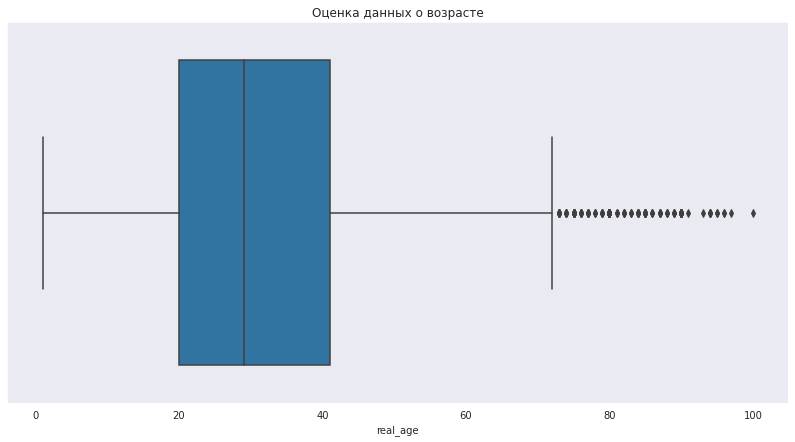

In [7]:
plt.figure(figsize=(14,7))
sb.boxplot(labels['real_age'])
plt.title('Оценка данных о возрасте')

*В данных предствлен все возраста от 1 до 100 лет. Преобладают фотографии людей в возрасте от 20 до 40 лет. Данные распределены нормально. Аномальных значений нет.*

## Просмотр фотографий

In [8]:
labels.head(15)

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17
5,000005.jpg,27
6,000006.jpg,24
7,000007.jpg,43
8,000008.jpg,26
9,000009.jpg,39


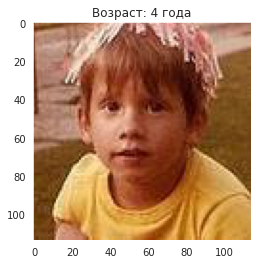

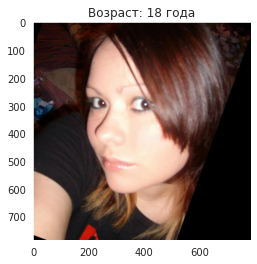

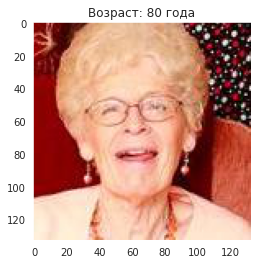

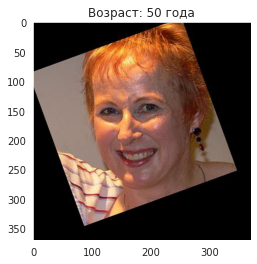

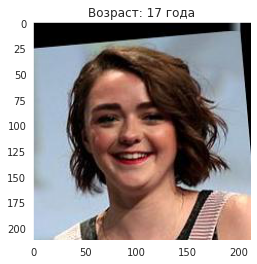

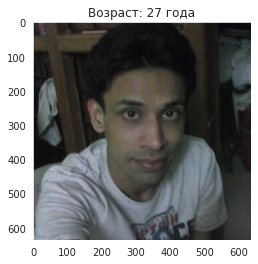

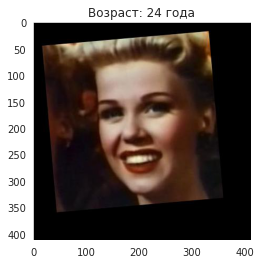

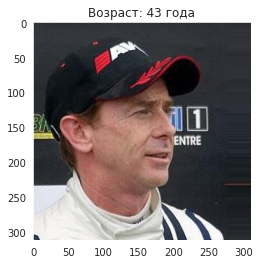

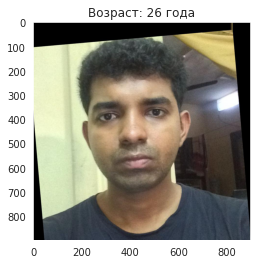

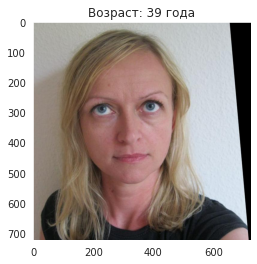

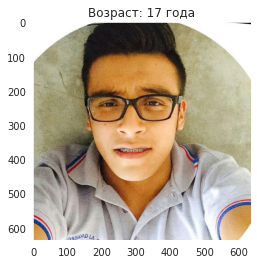

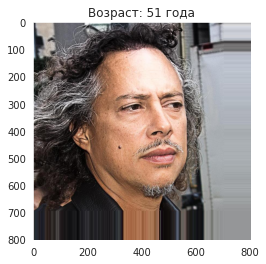

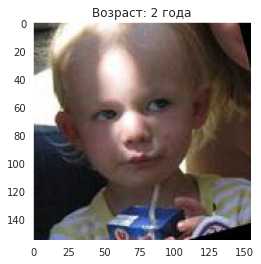

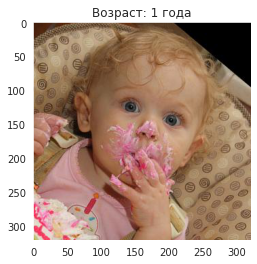

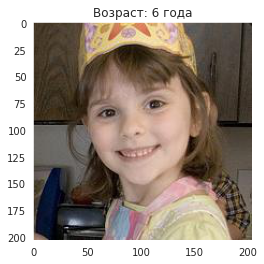

In [9]:
for a,b in zip(labels.file_name[:15], labels.real_age[:15]):
    image = Image.open('/datasets/faces/final_files/'+a)
    array = np.array(image)
    plt.imshow(array)
    plt.title('Возраст: {:.0f} года'.format(b))
    plt.show()

*Визуализированы 15 различных фотографий с указанием возраста людей, изображённых на них. Все изображения разного размера и разного качества.*

## Промежуточный вывод

Данные содетжат 7591 фотографию с указанием возраста и названия фотографии. В датасете представлены изображения людей в возрасте от года и до 100 лет. Наибольшее количество фотографий пренадлежит людям в возрасте от 20 до 40 лет.<br>
Все данные в таблице распределены правильно. Сдвиг предположительно обусловлен тем, что в более молодом возрасте люди больше фотографируюются, чем в зрелом.<br>
Судя по просмотренным изображениям, качество снимков разное. Присутствуюn чёрно-белые фотографии, каринки ориентированные горизонтально и изображения разной яркости. Поэтому для трениорвки модели уместно будет применить к фотографиям поворот и изменения яркости.